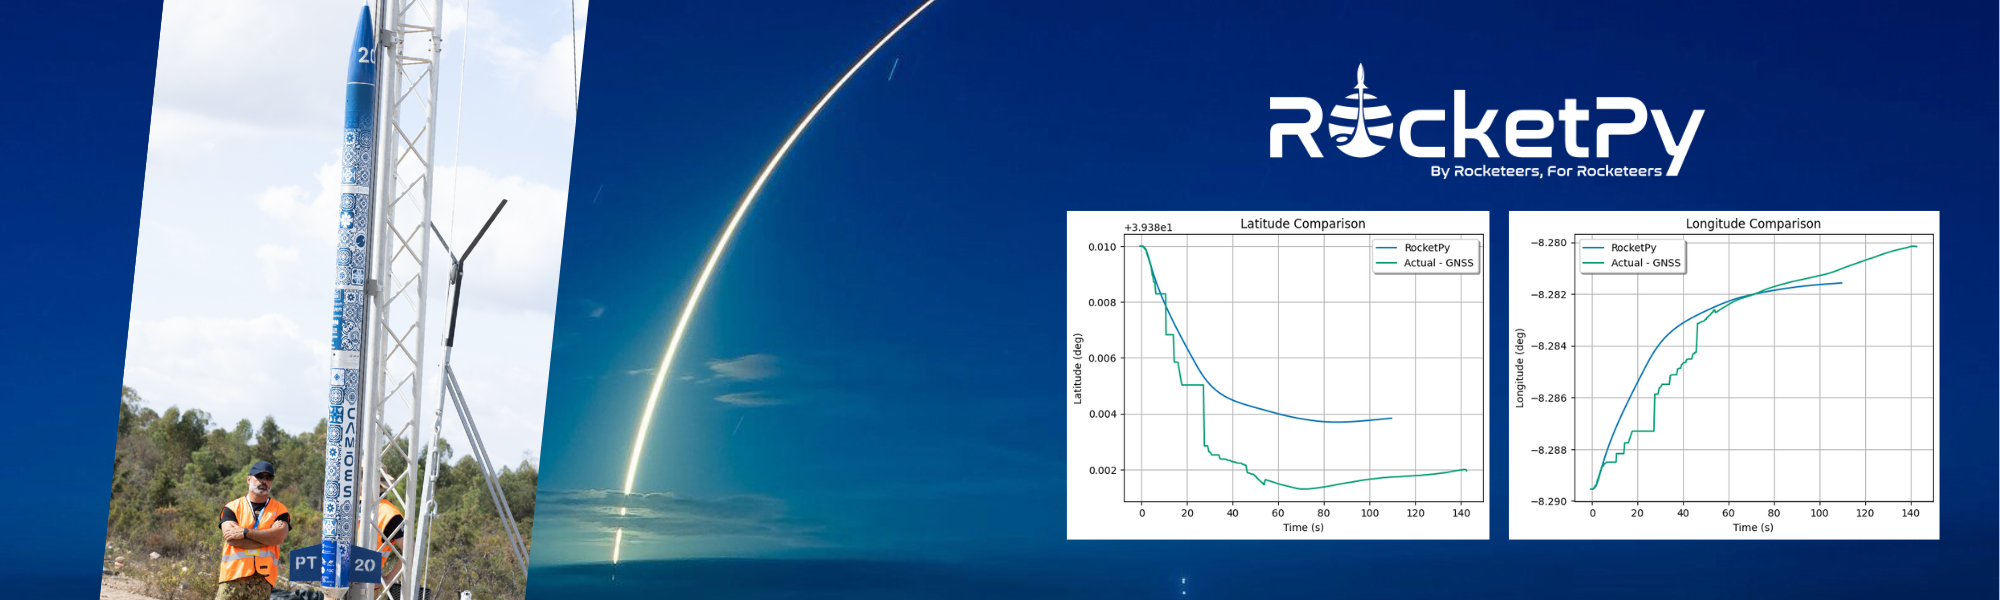

# **Anomaly Detection Machine Learning (The Isolation Forest Method) using RocketPy Camões Model Rocket Data**
Read more about the Camões Rocket launched at EUROC’23 achieving the target apogee of 3000 m here: https://docs.rocketpy.org/en/latest/examples/camoes_flight_sim.html

# Flight anomaly detection in model rockets using the Isolation Forest method works by identifying altitude deviations **between actual and simulated flight data**.

The Isolation Forest algorithm detects anomalies in model rocket altitude data by comparing real altitude readings with simulated readings produced using [Python RocketPy](https://docs.rocketpy.org/en/latest/user/first_simulation.html)


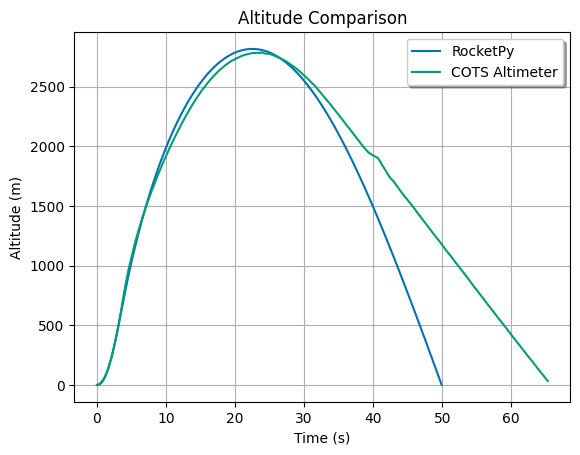

# **Why is this useful for model rockets?**
- Detect Flight Issues: Helps identify unexpected altitude variations due to wind, engine failure, or structural issues.
- Compare with Simulations: Allows engineers to assess the accuracy of their flight models.
- Automatic Detection: No need to manually inspect data; the model flags issues automatically.

# Flight Anomaly Detection (Example 1)

# 1. Data Preparation
Load the rocket altitude data (altitude_m) and the simulated altitude (simulated_altitude_m) from the CSV file.
These two columns are combined into a 2D array so that the Isolation Forest model can analyse them together.

# 2. Training the Isolation Forest
Isolation Forest is an unsupervised machine learning algorithm that detects anomalies by isolating data points that behave differently from the majority.
The contamination parameter (0.1) means the model assumes 10% of the data points are anomalies.
The model is then fitted on the combined altitude data.

# 3. Detecting Anomalies
After training, the model predicts whether a point is normal (+1) or an anomaly (-1).
Anomalies typically occur when the real altitude deviates significantly from the simulated altitude.

# 4. Visualisation
The normal data points are plotted in green, while detected anomalies are plotted in purple to highlight unusual flight behaviors.

#Step 1 Data Preparation:
The real altitude data and simulated altitude data are combined into a 2D array (data) for feeding into the Isolation Forest model.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Sample data: GPS speed and airspeed
all_data = pd.read_csv('rocketdata.csv')
altitude_data = all_data[['altitude_m']]
sim_altitude_data = all_data[['simulated_altitude_m']]

In [3]:
print(all_data.columns)

Index(['timestamp_s', 'altitude_m', 'simulated_altitude_m'], dtype='object')


In [4]:
altitude_data.head()

,altitude_m
0,0
1,1
2,3
3,6
4,10


In [5]:
sim_altitude_data.head()

,simulated_altitude_m
0,0.000000
1,0.065181
2,0.941919
3,2.934569
4,6.036944


In [6]:
# Combine the data into a 2D array for isolation forest
data = np.column_stack((altitude_data, sim_altitude_data))

#Step 2 Isolation Forest:
The model is trained using the contamination parameter, which controls the percentage of points classified as anomalies (in this case, 10%).



In [7]:
# Fit Isolation Forest model
clf = IsolationForest(contamination=0.1)  # Detect 10% as outliers # or adjust contamination rate to detect more/fewer anomalies
clf.fit(data)

IsolationForest(contamination=0.1)

#Step 3 Predictions:
The predictions from the Isolation Forest (1 for normal points, -1 for anomalies) are used to separate the data into two groups for visualisation.


In [8]:
# Predict anomalies (-1 for anomalies, 1 for normal points)
predictions = clf.predict(data)

#Step 4 Plotting:
Two scatter plots are created and overlayed, one for normal points (green) and one for anomalies (purple).

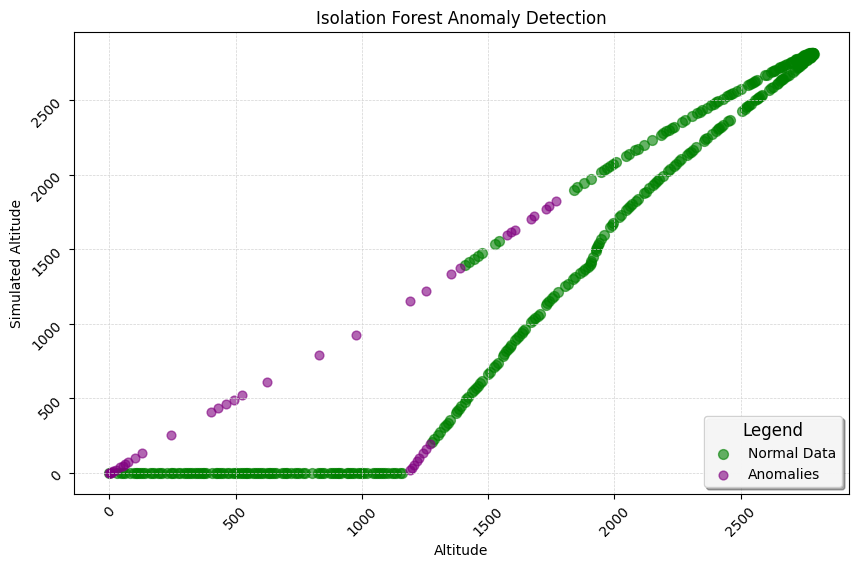

In [9]:
# Plotting the results

# Create plot area with grid
plt.figure(figsize=(10, 6))
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot normal points (labeled as 1) as blue scatter plot
normal = data[predictions == 1]
plt.scatter(normal[:, 0], normal[:, 1], color='green', label='Normal Data', alpha=0.6, s=50)

# Plot anomaly points (labeled as -1) as orange scatter plot
anomalies = data[predictions == -1]
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='purple', label='Anomalies', alpha=0.6, s=40)

# Add labels and title
plt.xlabel('Altitude')
plt.ylabel('Simulated Altitude')
plt.title('Isolation Forest Anomaly Detection')
plt.legend(loc='lower right', frameon=True, shadow=True, fontsize='medium', title='Legend', title_fontsize='large', framealpha=0.9)

# Plotting chart limits
plt.xlim()
plt.ylim()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

# Improved Visualisation for Better Insights into Anomalies (Example 2)
- Scatter Plot with Anomalies Highlighted (Matplotlib & Seaborn)
- Line Plot of Altitude vs. Time to see altitude changes over time
- Interactive Plot (Plotly) to explore anomalies dynamically
- Histogram of Altitude Differences to see distribution

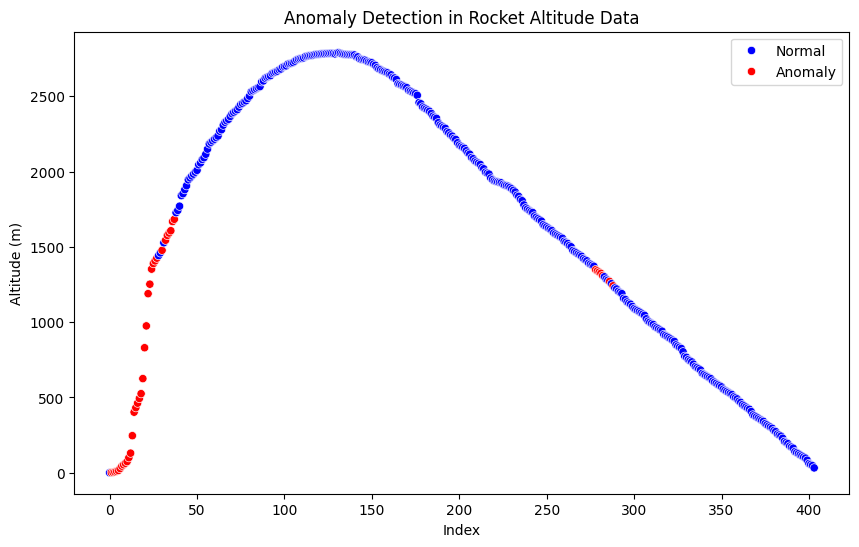

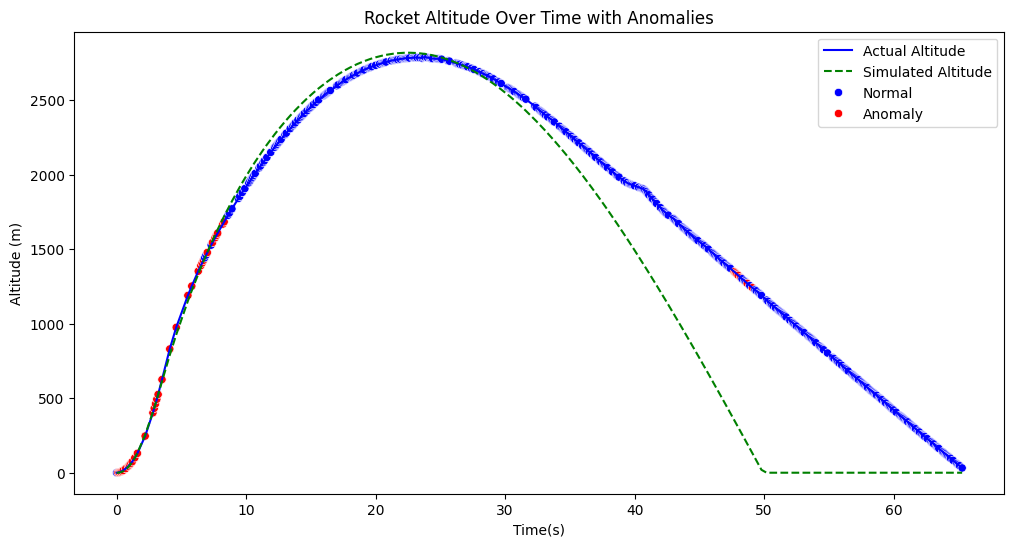

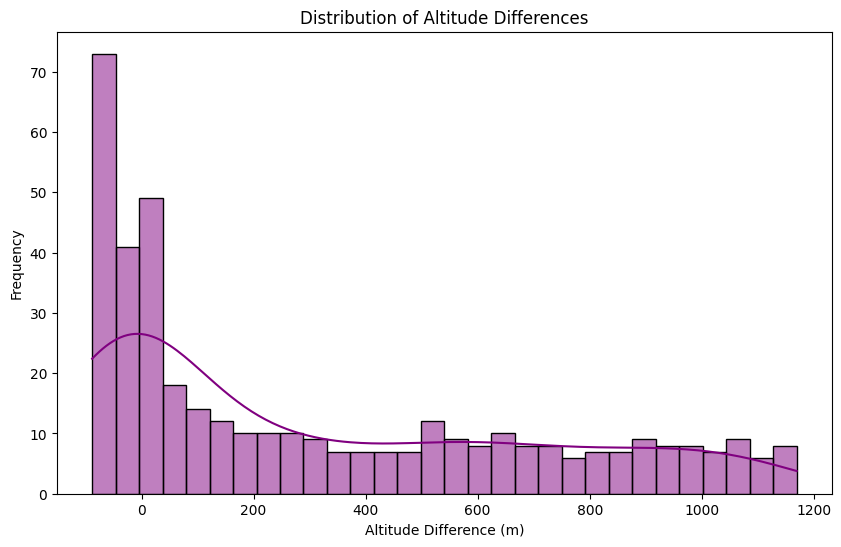

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import IsolationForest

# Load Data
df = pd.read_csv("rocketdata.csv")

# Define Features for Anomaly Detection
features = ["altitude_m", "simulated_altitude_m"]
X = df[features]

# Apply Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
df["anomaly"] = model.fit_predict(X)

df["anomaly"] = df["anomaly"].map({1: "Normal", -1: "Anomaly"})

df["altitude_diff"] = df["altitude_m"] - df["simulated_altitude_m"]

# Scatter Plot with Anomalies Highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df["altitude_m"], hue=df["anomaly"], palette={"Normal": "blue", "Anomaly": "red"})
plt.xlabel("Index")
plt.ylabel("Altitude (m)")
plt.title("Anomaly Detection in Rocket Altitude Data")
plt.legend()
plt.show()

# Line Plot of Altitude vs. Time
plt.figure(figsize=(12, 6))
plt.plot(df["timestamp_s"], df["altitude_m"], label="Actual Altitude", color="blue")
plt.plot(df["timestamp_s"], df["simulated_altitude_m"], label="Simulated Altitude", color="green", linestyle="dashed")
sns.scatterplot(x=df["timestamp_s"], y=df["altitude_m"], hue=df["anomaly"], palette={"Normal": "blue", "Anomaly": "red"})
plt.xlabel("Time(s)")
plt.ylabel("Altitude (m)")
plt.title("Rocket Altitude Over Time with Anomalies")
plt.legend()
plt.show()

# Interactive Plot with Plotly
fig = px.scatter(df, x="timestamp_s", y="altitude_m", color="anomaly", title="Interactive Anomaly Detection")
fig.show()

# Histogram of Altitude Differences
plt.figure(figsize=(10, 6))
sns.histplot(df["altitude_diff"], bins=30, kde=True, color="purple")
plt.xlabel("Altitude Difference (m)")
plt.ylabel("Frequency")
plt.title("Distribution of Altitude Differences")
plt.show()


# Observations:
- the model identifies the boost phase of the flight as an anomaly, which makes sense since it’s the only phase where the rocket’s acceleration opposes its weight (causing a rapid increase in altitude)
- the anomalies detected during the descent phase may be due to the main parachute’s ejection, despite its unsuccessful deployment (this likely explains the patterns in the first two graphs, as they display the same data with a different axis)

- the ascent phase is nearly perfect, however the simulated data and the flight data differ in the descent phase (aerodynamic models for the parachute simulations can be truly difficult to manage)
- even though RocketPy can have results that differ from reality, its model is extremely accurate ...though the team are still working toward its further improvment!

#Anomaly Visualisation with Improved Features (Example 3)

- More Robust Anomaly Detection: Added Z-score and IQR methods alongside Isolation Forest.
- Interactive Visualisations: Used Plotly for dynamic charts.
- Customisable Thresholds: Allows users to adjust sensitivity.
- Performance Metrics: Added precision, recall, and F1-score for evaluation.

Enhanced Demonstration Code Explanation:
- Z-score Method: This statistical approach measures how many standard deviations a point is from the mean. Data points beyond a chosen threshold (e.g., ±3) are considered anomalies.
- IQR (Interquartile Range) Method: Identifies anomalies based on data spread. Any point outside 1.5 times the interquartile range is flagged as an outlier.
- Isolation Forest: A machine learning model that isolates anomalies by randomly partitioning data. Anomalies are more likely to be isolated earlier due to their uniqueness.
- Legend: Blue dots (Normal data points), Red Dots (Detected anomalies based on the combined methods)

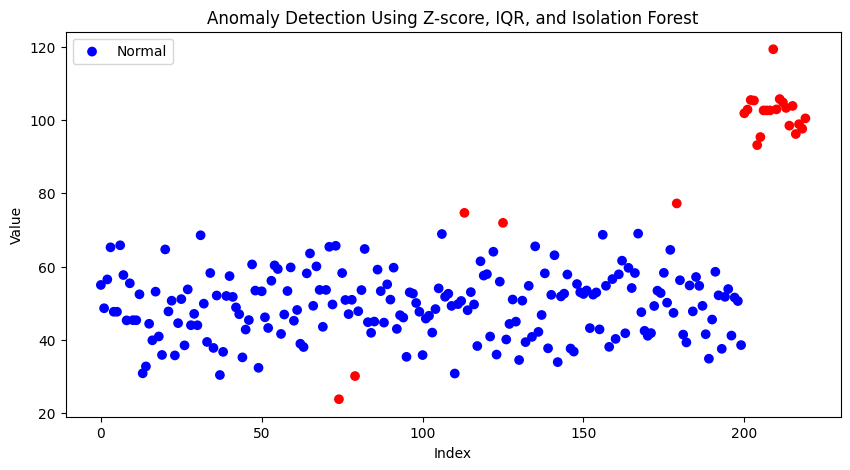

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

# Generate synthetic data
np.random.seed(42)
data = np.concatenate([np.random.normal(50, 10, 200), np.random.normal(100, 5, 20)])
df = pd.DataFrame(data, columns=['Value'])

# Z-score method
df['Z-score'] = zscore(df['Value'])
df['Z-anomaly'] = (np.abs(df['Z-score']) > 3)

# IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
df['IQR-anomaly'] = (df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR))

# Isolation Forest method
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Iso-anomaly'] = iso_forest.fit_predict(df[['Value']]) == -1

# Consolidating results (an anomaly if flagged by any method)
df['Anomaly'] = df[['Z-anomaly', 'IQR-anomaly', 'Iso-anomaly']].any(axis=1)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['Value'], c=df['Anomaly'].map({True: 'red', False: 'blue'}), label='Data Points')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Anomaly Detection Using Z-score, IQR, and Isolation Forest')
plt.legend(['Normal', 'Anomaly'], loc='upper left')
plt.show()